In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tushare as ts
warnings.filterwarnings("ignore")

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [198]:
code = '600519'
# GFGF = ts.get_hist_data('300433')
DetailINFO = ts.get_hist_data(code, '2019-01-01', '2020-12-31')
DetailINFO

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-10-23,1740.78,1747.59,1715.33,1714.00,19291.69,-27.17,-1.56,1724.832,1727.977,1694.974,21527.04,22837.12,25631.61,0.15
2020-10-22,1730.00,1745.00,1742.50,1715.51,22480.87,9.17,0.53,1724.166,1726.044,1692.733,21144.17,24331.94,27851.01,0.18
2020-10-21,1734.10,1742.15,1733.33,1723.00,18901.37,-0.67,-0.04,1720.666,1718.644,1691.863,19888.87,24792.64,27852.77,0.15
2020-10-20,1699.99,1734.97,1734.00,1695.00,27734.93,35.00,2.06,1719.800,1710.541,1693.197,20204.88,24645.58,27948.75,0.22
2020-10-19,1725.00,1733.98,1699.00,1691.90,19226.32,-13.00,-0.76,1720.800,1703.241,1694.797,19246.67,24295.31,28114.80,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-03,666.00,673.68,670.84,658.00,36326.53,3.01,0.45,674.152,674.152,674.152,44960.19,44960.19,44960.19,0.29
2018-05-02,660.00,668.99,667.01,645.06,70259.11,4.48,0.68,674.980,674.980,674.980,47118.61,47118.61,47118.61,0.56
2018-04-27,685.25,688.36,663.98,655.00,57915.21,-14.25,-2.10,677.637,677.637,677.637,39405.11,39405.11,39405.11,0.46


In [199]:
DetailINFO = DetailINFO.iloc[:,:5].sort_index()
DetailINFO.index = pd.to_datetime(DetailINFO.index, format = '%Y-%m-%d')
DetailINFO

,open,high,close,low,volume
date,,,,,
2018-04-25,689.00,692.00,691.00,683.02,25252.22
2018-04-26,692.00,692.28,677.93,673.00,35047.90
2018-04-27,685.25,688.36,663.98,655.00,57915.21
2018-05-02,660.00,668.99,667.01,645.06,70259.11
2018-05-03,666.00,673.68,670.84,658.00,36326.53
...,...,...,...,...,...
2020-10-19,1725.00,1733.98,1699.00,1691.90,19226.32
2020-10-20,1699.99,1734.97,1734.00,1695.00,27734.93
2020-10-21,1734.10,1742.15,1733.33,1723.00,18901.37


In [200]:
DetailINFOclp = DetailINFO.close
clprcChange = DetailINFOclp - DetailINFOclp.shift(1)
clprcChange = clprcChange.dropna()
clprcChange.head()

date
2018-04-26   -13.07
2018-04-27   -13.95
2018-05-02     3.03
2018-05-03     3.83
2018-05-04    -7.89
Name: close, dtype: float64

In [201]:
indexprc = clprcChange.index
upPrc = pd.Series(0, index=indexprc)
upPrc[clprcChange > 0] = clprcChange[clprcChange > 0]
downPrc = pd.Series(0, index=indexprc)
downPrc[clprcChange < 0] = -clprcChange[clprcChange < 0]
rsidata = pd.concat([DetailINFOclp, clprcChange, upPrc, downPrc], axis=1)
rsidata.columns = ['close', 'clprcChange', 'upPrc', 'downPrc']
rsidata = rsidata.dropna()
rsidata.head()

,close,clprcChange,upPrc,downPrc
date,,,,
2018-04-26,677.93,-13.07,0.00,13.07
2018-04-27,663.98,-13.95,0.00,13.95
2018-05-02,667.01,3.03,3.03,0.00
2018-05-03,670.84,3.83,3.83,0.00
2018-05-04,662.95,-7.89,0.00,7.89


In [202]:
SMUP = []
SMDOWN = []
for i in range(6, len(upPrc) + 1):
    SMUP.append(np.mean(upPrc.values[(i-6):i], dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i], dtype=np.float32))

In [203]:
SMDOWN[0:5]

[5.818333, 3.64, 2.4666665, 2.4666665, 2.4666665]

In [204]:
SMUP[0:5]

[6.965, 8.801667, 8.801667, 10.353333, 10.27]

In [205]:
rsi6 = [100*(SMUP[i]/(SMUP[i]+SMDOWN[i])) for i in range(0 ,len(SMUP))]

In [206]:
# 下面这行可以改成5，15，23分别代表6天，16天，24天
indexRsi = indexprc[5:]
Rsi6 = pd.Series(rsi6, index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    601.000000
mean      55.991570
std       24.756637
min        0.000000
25%       38.308552
50%       57.842761
75%       75.536853
max      100.000000
dtype: float64

Text(0, 0.5, 'Rsi6')

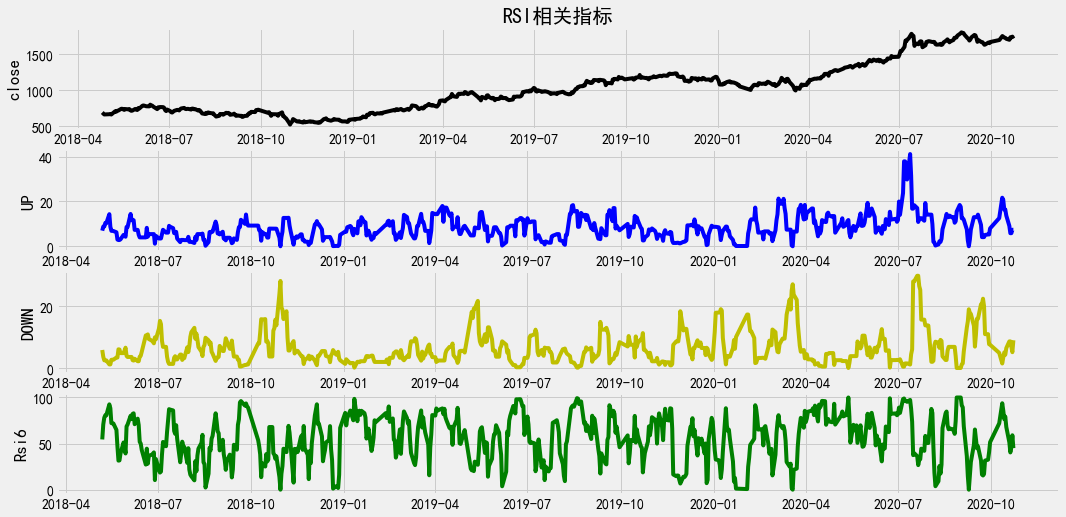

In [207]:
fig = plt.figure(figsize=(16, 8))
UP = pd.Series(SMUP,index=indexRsi)
DOWN = pd.Series(SMDOWN,index=indexRsi)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(411)
plt.plot(DetailINFOclp, 'k')
plt.xlabel('date')
plt.ylabel('close')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.title('RSI相关指标')
plt.subplot(412)
plt.plot(UP, 'b')
plt.ylabel('UP')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.subplot(413)
plt.plot(DOWN, 'y')
plt.ylabel('DOWN')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.subplot(414)
plt.plot(Rsi6, 'g')
plt.ylabel('Rsi6')
# plt.gca().set_xticks(DetailINFOclp.index[::50])

In [208]:
def rsi(price, period = 6):
    import pandas as pd
    clprcChange = price - price.shift(1)
    clprcChange = clprcChange.dropna()
    indexprc = clprcChange.index
    upPrc = pd.Series(0, index=indexprc)
    upPrc[clprcChange > 0] = clprcChange[clprcChange > 0]
    downPrc = pd.Series(0, index=indexprc)
    downPrc[clprcChange < 0] = -clprcChange[clprcChange < 0]
    rsidata = pd.concat([DetailINFOclp, clprcChange, upPrc, downPrc], axis=1)
    rsidata.columns = ['price', 'prcChange', 'upPrc', 'downPrc']
    rsidata = rsidata.dropna()
    SMUP = []
    SMDOWN = []
    for i in range(period, len(upPrc) + 1):
        SMUP.append(np.mean(upPrc.values[(i-period):i], dtype=np.float32))
        SMDOWN.append(np.mean(downPrc.values[(i-period):i], dtype=np.float32))
        rsi = [100*(SMUP[i]/(SMUP[i]+SMDOWN[i])) for i in range(0 ,len(SMUP))]
    indexRsi = indexprc[(period-1):]
    rsi = pd.Series(rsi, index=indexRsi)
    return (rsi)

In [209]:
Rsi12 = rsi(DetailINFOclp, 12)
Rsi12.tail()

date
2020-10-19    61.618316
2020-10-20    73.231244
2020-10-21    72.304475
2020-10-22    70.028508
2020-10-23    64.200425
dtype: float64

In [210]:
Rsi24 = rsi(DetailINFOclp, 24)
Rsi24.tail()

date
2020-10-19    47.497138
2020-10-20    52.205569
2020-10-21    54.629195
2020-10-22    53.815126
2020-10-23    48.163012
dtype: float64

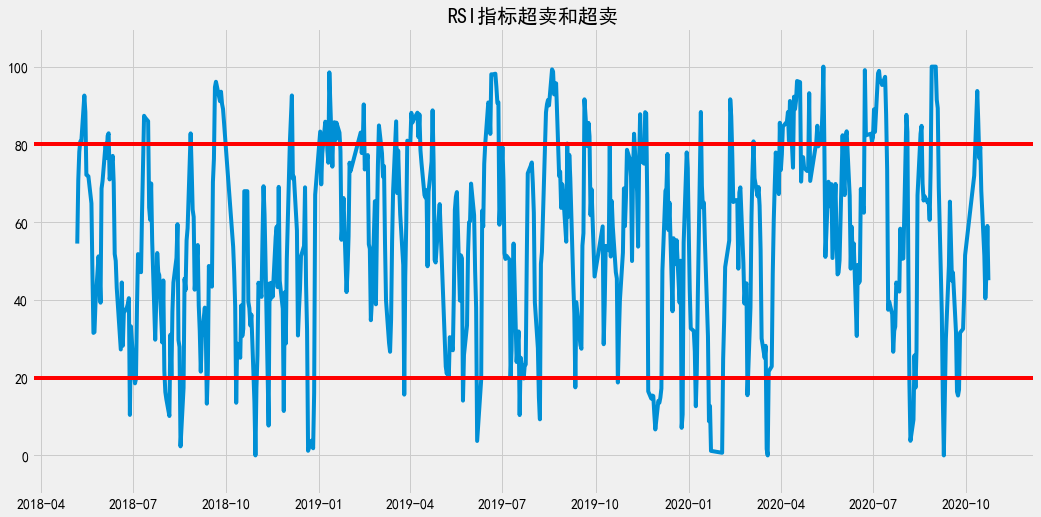

In [211]:
fig = plt.figure(figsize=(16, 8))
plt.plot(Rsi6)
plt.title('RSI指标超卖和超卖')
plt.ylim(-10, 110)

plt.axhline(y=80, color = 'red')
plt.axhline(y=20, color = 'red')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.show()

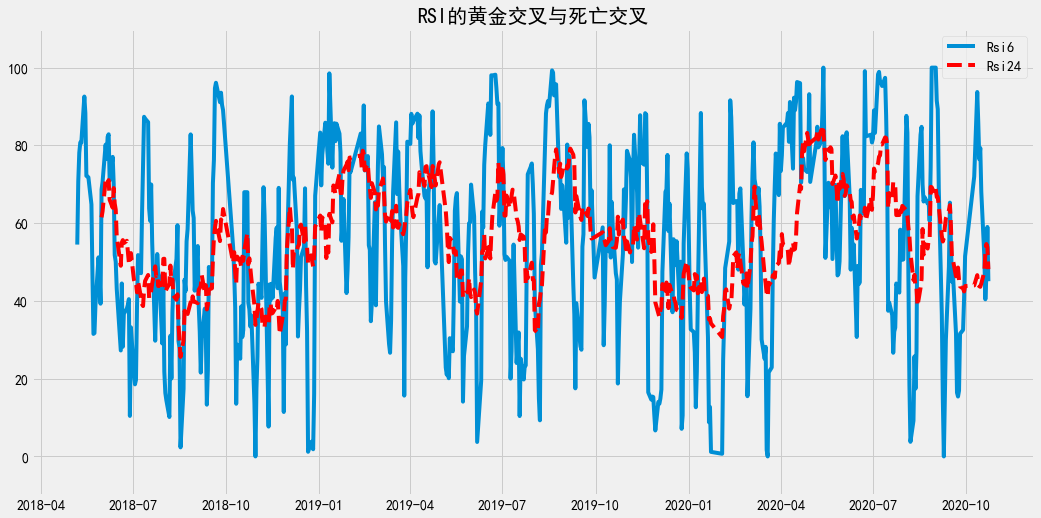

In [212]:
# 黄金交叉与死亡交叉
fig = plt.figure(figsize=(16, 8))
plt.plot(Rsi6['2015-01-03':], label = 'Rsi6')
plt.plot(Rsi24['2015-01-03':], label = 'Rsi24', color = 'red', linestyle = 'dashed')
plt.title('RSI的黄金交叉与死亡交叉')
plt.ylim(-10, 110)
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.legend()

In [213]:
DetailINFO = ts.get_hist_data(code, '2019-01-01', '2020-12-31')
DetailINFO = DetailINFO.iloc[:,:5].sort_index()
DetailINFO.index = pd.to_datetime(DetailINFO.index, format = '%Y-%m-%d')
DetailINFOclp = DetailINFO.close

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [214]:
rsi6 = rsi(DetailINFOclp, 10)
rsi24 = rsi(DetailINFOclp, 40)
rsi6

date
2019-01-16    79.853904
2019-01-17    85.729027
2019-01-18    87.343276
2019-01-21    87.329358
2019-01-22    76.605320
                ...    
2020-10-19    67.313427
2020-10-20    68.851358
2020-10-21    71.830380
2020-10-22    70.721334
2020-10-23    55.422771
Length: 428, dtype: float64

In [215]:
# rsi6捕捉买卖点
Sig1 = []
for i in rsi6:
  if i > 80:
    Sig1.append(-1)
  elif i < 20:
    Sig1.append(1)
  else:
    Sig1.append(0)

In [216]:
date1 = rsi6.index
date1
Signal1 = pd.Series(Sig1, index = date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)

date
2019-01-17   -1
2019-01-18   -1
2019-01-21   -1
dtype: int64

In [217]:
Signal2 = pd.Series(0, index = rsi24.index)
lagrsi6 = rsi6.shift(1)
lagrsi24 = rsi24.shift(1)
for i in rsi24.index:
  if (rsi6[i] > rsi24[i]) & (lagrsi6[i] < lagrsi24[i]):
    Signal2[i] = 1
  elif (rsi6[i] < rsi24[i]) & (lagrsi6[i] > lagrsi24[i]):
    Signal2[i] = -1
Signal = Signal1 + Signal2
Signal[Signal >= 1] = 1
Signal[Signal <= -1] = -1
Signal = Signal.dropna()
tradSig = Signal.shift(1)
ret = DetailINFOclp / DetailINFOclp.shift(1) - 1
ret.head()
ret = ret[tradSig.index]
buy = tradSig[tradSig == 1]
buyRet = ret[tradSig == 1] * buy
sell = tradSig[tradSig == -1]
sellRet = ret[tradSig == -1] * sell
tradRet = ret*tradSig

In [218]:
Signal2[Signal2 == 1]

date
2019-03-21    1
2019-03-26    1
2019-03-29    1
2019-04-23    1
2019-04-29    1
2019-06-06    1
2019-06-11    1
2019-06-14    1
2019-08-12    1
2019-09-26    1
2019-10-08    1
2019-10-30    1
2019-11-04    1
2019-12-13    1
2019-12-26    1
2020-01-09    1
2020-01-16    1
2020-01-22    1
2020-02-11    1
2020-02-27    1
2020-03-02    1
2020-03-31    1
2020-05-18    1
2020-06-05    1
2020-06-10    1
2020-06-29    1
2020-08-07    1
2020-08-21    1
2020-10-09    1
dtype: int64

In [219]:
Signal2[Signal2 == -1]

date
2019-03-25   -1
2019-03-28   -1
2019-04-22   -1
2019-04-24   -1
2019-04-30   -1
2019-06-10   -1
2019-06-13   -1
2019-07-04   -1
2019-09-05   -1
2019-09-30   -1
2019-10-09   -1
2019-10-31   -1
2019-11-22   -1
2019-12-20   -1
2020-01-02   -1
2020-01-13   -1
2020-01-21   -1
2020-01-23   -1
2020-02-25   -1
2020-02-28   -1
2020-03-16   -1
2020-05-15   -1
2020-05-20   -1
2020-06-08   -1
2020-06-11   -1
2020-07-16   -1
2020-08-10   -1
2020-09-08   -1
dtype: int64

Text(0, 0.5, 'stock return')

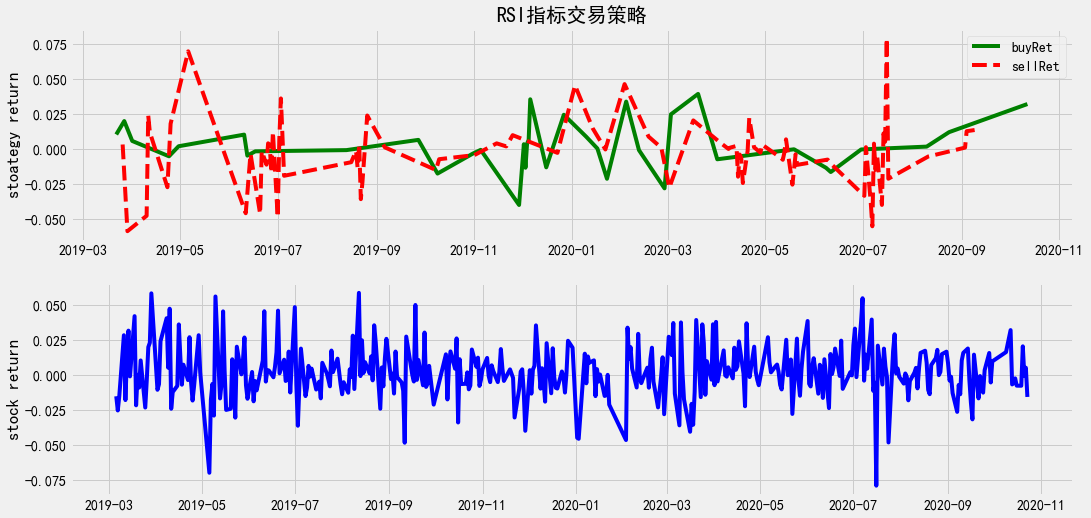

In [220]:
# 如果第一个图画的有问题，需要把索引的时间转换一下
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(211)
plt.plot(buyRet, label = 'buyRet', color = 'g')
plt.plot(sellRet, label = 'sellRet', color = 'r', linestyle = 'dashed')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.title('RSI指标交易策略')
plt.ylabel('stoategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret, 'b')
plt.ylabel('stock return')
# plt.gca().set_xticks(DetailINFOclp.index[::50])

In [221]:
def start(tradeSignal, ret):
  indexDate = tradeSignal.index
  ret = ret[indexDate]
  tradeRet = ret * tradeSignal
  tradeRet[tradeRet == (-0)] = 0
  winRate = len (tradeRet[tradeRet > 0])/len(tradeRet[tradeRet!=0])
  meanWin = sum (tradeRet[tradeRet > 0])/len(tradeRet[tradeRet> 0])
  meanLoss= sum (tradeRet[tradeRet < 0])/len(tradeRet[tradeRet< 0])
  perform = {'winRate':winRate, 'meanWin':meanWin, 'meanLoss':meanLoss}
  return (perform)

In [222]:
#策略
tradSig2 = Signal.shift(3)
ret2 = ret[tradSig2.index]
buy2 = tradSig[tradSig2 == 1]
buyRet2 = ret2[tradSig2 == 1] * buy2
sell2= tradSig2[tradSig2 == -1]
sellRet2= ret2[tradSig2 ==-1] * sell2
tradeRet2 = ret2 * tradSig2
BuyOnly2 = start(buy2, ret2)
SellOnly2 = start(sell2, ret2)
Trade2 = start(tradSig2, ret2)
Test2 = pd.DataFrame({"BuyOnly2":BuyOnly2,"SellOnly2":SellOnly2,"Trade2":Trade2})
Test2

,BuyOnly2,SellOnly2,Trade2
winRate,0.533333,0.463415,0.479339
meanWin,0.015978,0.013858,0.015696
meanLoss,-0.019850,-0.017067,-0.014887


In [223]:
cumTrade2 = np.cumprod(1 + tradeRet2) - 1
print(cumTrade2[-1])

-0.007623339857399047


Text(0, 0.5, 'cumTrade2')

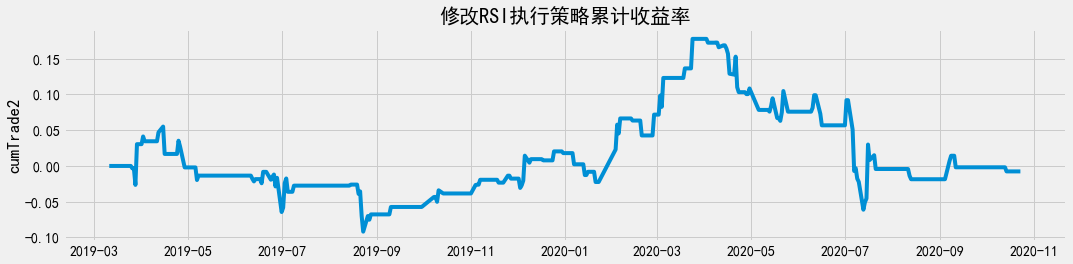

In [224]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(211)
plt.plot(cumTrade2)
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.title('修改RSI执行策略累计收益率')
plt.ylabel('cumTrade2')

In [225]:
s2 = Signal2[Signal2 == 1]
s1 = Signal2[Signal2 ==-1]

In [226]:
s2['2019']

date
2019-03-21    1
2019-03-26    1
2019-03-29    1
2019-04-23    1
2019-04-29    1
2019-06-06    1
2019-06-11    1
2019-06-14    1
2019-08-12    1
2019-09-26    1
2019-10-08    1
2019-10-30    1
2019-11-04    1
2019-12-13    1
2019-12-26    1
dtype: int64

In [227]:
DetailINFO.loc['2020']

,open,high,close,low,volume
date,,,,,
2020-01-02,1128.00,1145.06,1130.00,1116.00,148099.16
2020-01-03,1117.00,1117.00,1078.56,1076.90,130318.78
2020-01-06,1070.86,1092.90,1077.99,1067.30,63414.78
2020-01-07,1077.50,1099.00,1094.53,1076.40,47853.59
2020-01-08,1085.05,1095.50,1088.14,1082.58,25008.25
...,...,...,...,...,...
2020-10-19,1725.00,1733.98,1699.00,1691.90,19226.32
2020-10-20,1699.99,1734.97,1734.00,1695.00,27734.93
2020-10-21,1734.10,1742.15,1733.33,1723.00,18901.37


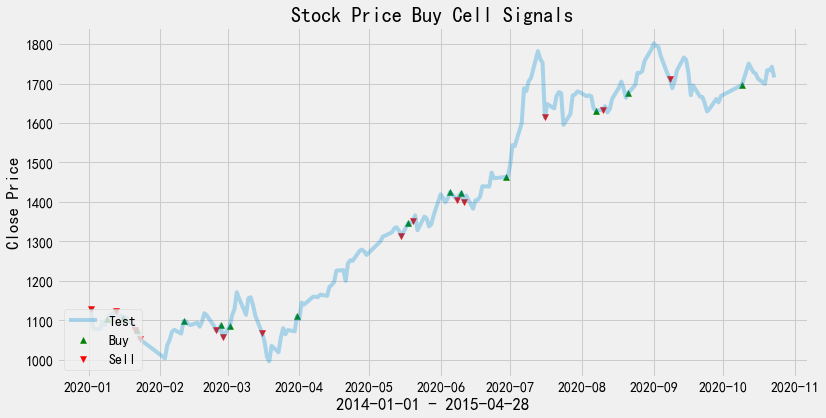

In [228]:
fig = plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
plt.plot(DetailINFO.loc['2020'].close, label= 'Test', alpha = 0.3)
plt.scatter(s2['2020'].index,DetailINFO.loc[s2['2020'].index].close, label='Buy', marker = "^", color = 'green')
plt.scatter(s1['2020'].index,DetailINFO.loc[s1['2020'].index].close, label='Sell', marker = "v", color = 'red')
# plt.gca().set_xticks(DetailINFOclp.index[::50])
plt.title('Stock Price Buy Cell Signals')
plt.xlabel('2014-01-01 - 2015-04-28')
plt.ylabel('Close Price')
plt.legend(loc = 'lower left')

In [229]:
templsell = DetailINFO.loc[s1.index, 'close']
templsell = templsell.to_frame()
templsell.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-03-25 to 2020-09-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   28 non-null     float64
dtypes: float64(1)
memory usage: 1.7 KB


In [230]:
templsell.columns = ['Sell']
templsell.head()

,Sell
date,
2019-03-25,775.6
2019-03-28,806.8
2019-04-22,949.2
2019-04-24,970.0
2019-04-30,974.0


In [231]:
templbuy = DetailINFO.loc[s2.index, 'close']
templbuy = templbuy.to_frame()
templbuy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2019-03-21 to 2020-10-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 1.7 KB


In [232]:
templbuy.columns = ['Buy']
templbuy.head()

,Buy
date,
2019-03-21,785.75
2019-03-26,773.00
2019-03-29,853.99
2019-04-23,974.95
2019-04-29,971.97


In [233]:
newdf = pd.DataFrame()
newdf = pd.concat([templbuy, templsell], sort=True)
newdf = newdf.sort_index()
newdf['diff'] = newdf['Sell'].shift(-1)
newdf['pct'] = (newdf['diff'] - newdf['Buy']) / newdf['Buy']
newdf.dropna(subset=['pct'], inplace = True)
newdf.head()

,Buy,Sell,diff,pct
date,,,,
2019-03-21,785.75,NaN,775.6,-0.012918
2019-03-26,773.00,NaN,806.8,0.043726
2019-03-29,853.99,NaN,949.2,0.111488
2019-04-23,974.95,NaN,970.0,-0.005077
2019-04-29,971.97,NaN,974.0,0.002089


In [234]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-03-21 to 2020-08-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Buy     28 non-null     float64
 1   Sell    0 non-null      float64
 2   diff    28 non-null     float64
 3   pct     28 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [235]:
print ("起始金额")
plus = 0
minus = 0
start = 100000
print (start)

for i in newdf['pct'].to_list()[:-1]:
  if i < 0:
    print (1 + i)
    start = start * (1 + i)
    print ("当前亏损，亏损%0.2f 当前本金是%0.2f" % (1+i, start))
    minus += 1
  else :
    print (1 + i)
    start = start * (1 + i)
    print ("当前盈利，盈利%0.2f 当前本金是%0.2f" % (1+i, start))
    plus += 1
  i = 0
  
print ("策略后金额")
print ("%0.2f" % (start))
var2 = ((start-100000)/100000)*100
print ("累就收益%0.2f%% " % (var2))
print ("累计胜负 胜%d，负%d" % (plus, minus))

起始金额
100000
0.9870824053452116
当前亏损，亏损0.99 当前本金是98708.24
1.04372574385511
当前盈利，盈利1.04 当前本金是103024.33
1.1114884249230086
当前盈利，盈利1.11 当前本金是114510.35
0.994922816554695
当前亏损，亏损0.99 当前本金是113928.96
1.0020885418274226
当前盈利，盈利1.00 当前本金是114166.91
1.0103812650064377
当前盈利，盈利1.01 当前本金是115352.10
0.9990229336143772
当前亏损，亏损1.00 当前本金是115239.40
1.074698795180723
当前盈利，盈利1.07 当前本金是123847.64
1.123077074109343
当前盈利，盈利1.12 当前本金是139090.45
0.9854327335047129
当前亏损，亏损0.99 当前本金是137064.28
0.9826150287036244
当前亏损，亏损0.98 当前本金是134681.42
0.9967984456833925
当前亏损，亏损1.00 当前本金是134250.23
0.9953400745254629
当前亏损，亏损1.00 当前本金是133624.64
0.9856405846947549
当前亏损，亏损0.99 当前本金是131705.86
0.9955070037882126
当前亏损，亏损1.00 当前本金是131114.11
1.0195610773555817
当前盈利，盈利1.02 当前本金是133678.84
0.9713640469738031
当前亏损，亏损0.97 当前本金是129850.82
0.9788844362209556
当前亏损，亏损0.98 当前本金是127108.95
0.9788797814207649
当前亏损，亏损0.98 当前本金是124424.38
0.9720523455246047
当前亏损，亏损0.97 当前本金是120947.01
0.9824955571311498
当前亏损，亏损0.98 当前本金是118829.90
1.1818181818181819
当前盈利，盈利1.